In [12]:
from main_Graph import * 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_artist = r'dane\dane_dwudzielny\artists.txt'
file_albums = r'dane\dane_dwudzielny\albums.txt'
file_pairs = r'dane\dane_dwudzielny\pairs.txt'

In [3]:
G = Graph()
G.addw_from_file(file_albums)
top_nodes = list(G.graph.nodes)
G.graph = nx.relabel_nodes(G.graph, lambda x: x.replace('$', 'S')) # prblem ze znakiem $ ze względu na wywietlanie nazw przy użyciu latexa 
G.addw_from_file(file_artist)
G.addk_from_file(file=file_pairs, bi=True)
G.graph = nx.relabel_nodes(G.graph, lambda x: x.replace('$', 'S')) # prblem ze znakiem $ ze względu na wywietlanie nazw przy użyciu latexa 

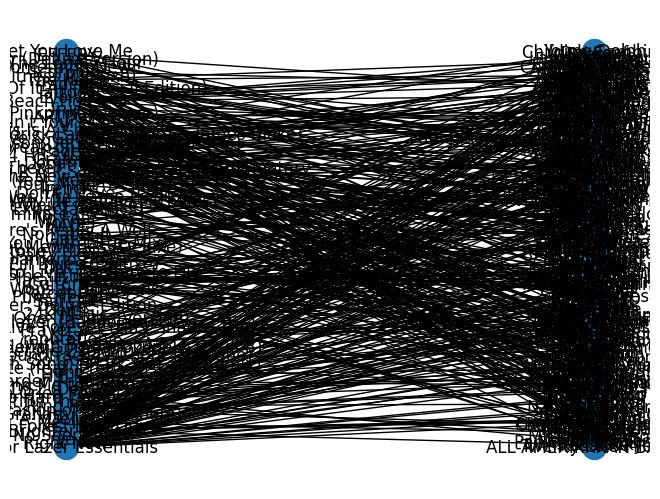

In [4]:
pos = nx.bipartite_layout(G.graph, top_nodes)
nx.draw(G.graph, pos, with_labels=True)
plt.show()

In [5]:
import hvplot.networkx as hvnx
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

pos = nx.bipartite_layout(G.graph, top_nodes)
plot = hvnx.draw(G.graph, pos, with_labels=True)
plot.opts(
    opts.Graph(
        node_color='index', 
        node_size=15, 
        edge_line_width=1, 
        width=600, 
        height=400, 
        tools=['hover'], 
        title="Bipartite Graph Visualization"
    )
)

plot

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

In [6]:
adj_matrix = nx.adjacency_matrix(G.graph)

In [7]:
adj_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

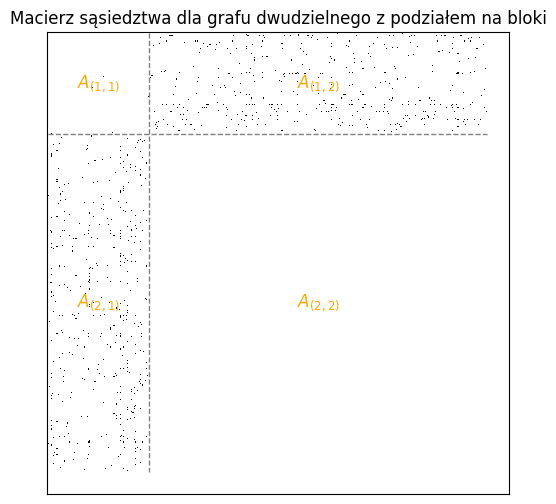

In [31]:
adj_matrix = nx.adjacency_matrix(G.graph).toarray()

n_top = len(top_nodes)
n_bottom = len(G.graph.nodes) - n_top

def show_matrix(matrix, title = "Macierz sąsiedztwa dla grafu dwudzielnego z podziałem na bloki"):
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.matshow(matrix, cmap='binary')

    ax.plot([n_top, n_top], [0, n_top + n_bottom], color='grey', linestyle='--', linewidth=1)
    ax.plot([0, n_top + n_bottom], [n_top, n_top], color='grey', linestyle='--', linewidth=1)

    ax.text(n_top / 2, n_top / 2, r'$A_{(1,1)}$', ha='center', va='center', fontsize=12, color="orange")
    ax.text(n_top + n_bottom / 2, n_top / 2, r'$A_{(1,2)}$', ha='center', va='center', fontsize=12, color="orange")
    ax.text(n_top / 2, n_top + n_bottom / 2, r'$A_{(2,1)}$', ha='center', va='center', fontsize=12, color="orange")
    ax.text(n_top + n_bottom / 2, n_top + n_bottom / 2, r'$A_{(2,2)}$', ha='center', va='center', fontsize=12, color="orange")

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(title)
    plt.show()

show_matrix(adj_matrix)

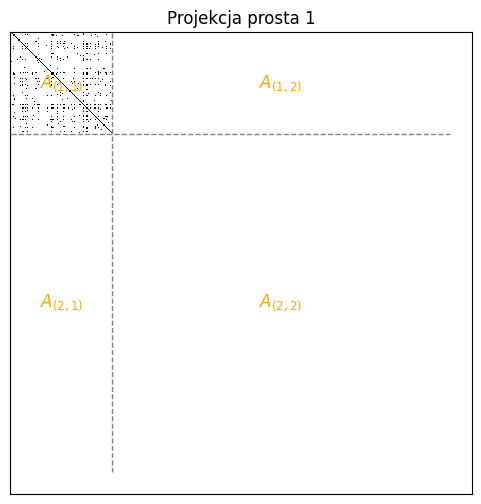

In [44]:
A_12 = adj_matrix[:n_top, n_top:]
A_11_simple = np.dot(A_12, A_12.T)
A_11_simple_binary = (A_11_simple > 0).astype(int)  # Binaryzacja

show_matrix(A_11_simple_binary, title='Projekcja prosta 1')

## Projekcja Jacarda

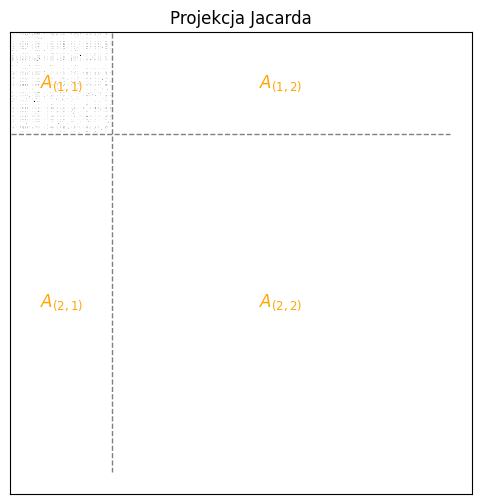

In [ ]:
def jaccard_index(A, i, j):
    # Zbieramy sąsiadów i i j (w formie wektorów)
    neighbors_i = A[i, :]
    neighbors_j = A[j, :]
    
    # Obliczamy przecięcie: liczba wspólnych sąsiadów
    intersection = np.sum(neighbors_i & neighbors_j)  # & to elementowe "AND" (bitowe porównanie)
    
    # Obliczamy sumę: liczba unikalnych sąsiadów
    union = np.sum(neighbors_i) + np.sum(neighbors_j) - intersection
    
    return intersection / union if union > 0 else 0


A_11_weighted = np.zeros_like(A_11_simple, dtype=float)

for i in range(A_11_simple.shape[0]):
    for j in range(A_11_simple.shape[1]):
        if i != j:  # Ignorujemy diagonalę (wskaźnik Jaccarda nie jest obliczany dla samego siebie)
            A_11_weighted[i, j] = jaccard_index(A_11_simple, i, j)

show_matrix(A_11_weighted, title='Projekcja Jacarda')

### Graf gęsty

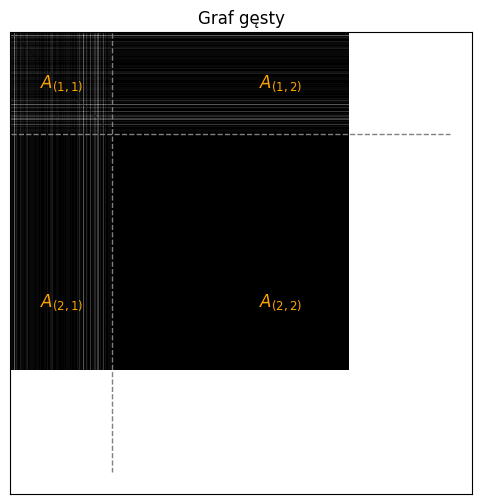

In [24]:
# łączy nas unikanie tych samych wierzchołków kategorii 2
A_12_complement = 1 - A_12
dense_projection = np.dot(A_12_complement, A_12_complement.T)
show_matrix(dense_projection, title='Graf gęsty')
